# Personalized Movie Recommendations Based on Historical User Behavior 

### Team Members
#### Deepa Rajareddy – Deepa.rajareddy@baruchmail.cuny.edu
####  Sera Ahmed – Sera.ahmed@baruchmail.cuny.edu
####  Shani Batat – Shani.batat@baruchmail.cuny.edu
#### Janani Ravichandran – Janani.ravichandran@baruchmail.cuny.edu
####  Alexandria Bottiglieri – Alexandria.bottiglieri@baruchmail.cuny.edu

#### A recommendation system is a machine learning algorithm that helps recommend new products or services to users. In order to do this, the historical behavior of the user is collected and analyzed. Recommender systems are widely used today; generating a playlist, platforms suggesting the next movie to watch or next item to purchase are all part of this information filtering system. 

#### In this particular project, we aim to understand consumer behavior based on past movie consumption and ratings to develop a sophisticated model that will recommend the next set of content that the user could potentially consume. 

### Dataset Description:
#### For this project, we will be using the MovieLens dataset from Kaggle - 
###### (https://www.kaggle.com/grouplens/movielens-20m-dataset)
#### This dataset contains 20 million movie rating and tagging activies from 7800 users, as well as spans from January 9, 1995 to March 31, 2015 (the dataset was generated as of October 17, 2016). 
#### Users in this dataset were selected at random, with each selected user having at least 20 ratings. The dataset also contains five different tables, which were merged to form a master dataset. 

#### Dataset 1: Tag - This contains the tags applied to the movies by the users. 
#### Dataset 2: Ratings - This contains the ratings of the movies by the users. 
#### Dataset 3: Movies - This contains information about the movies themselves, such as movie titles and genres.                 
#### Dataset 4: Link - This contains the mapping information of the various identifies. 
#### Dataset 5: Genome Scores - This contains the relevance of the tags applied by the users. 
#### Dataset 6: Genome Tags - This contains the tag names and tag IDs.                                                                                                                   
#### The primary focus of this project will be using Dataset 1, Dataset 2 and Dataset 3.

### Recommendation Systems Overview: 
#### Information filtering for recommendation systems specifically have multiple approaches to choose from. The most relevant approaches for this project are (A) Collaborative Filtering and (B) Content-Based Filtering. 

#### (A) Collaborative Filtering: 

#### Collaborative filtering is an algorithm which aims to find similar users or items and multiple ways to calculate ratings based on ratings of similar users. Depending on the choices you make, your result is a type of collaborative filtering approach. For this project, we have used item-based filtering techniques. 

#### (B) Content-Based Filtering: 

#### Content-based filtering uses features or parts of the content consumed to recommend other items similar to what the user likes, based on their previous ratings. For this project, we have used genre as the base for the content filtering.

### 1) As the first step, we aim to consolidate and merge the required datasets

In [ ]:
#Import libraries 

%matplotlib inline
import os
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
import pydotplus
import graphviz
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [ ]:
#Load the dataset 

In [ ]:
genome_scores_df = pd.read_csv('genome_scores.csv') #We will not require this dataset for this analysis

In [ ]:
genome_tags_df = pd.read_csv('genome_tags.csv') #We will not require this dataset for this analysis

In [ ]:
link_df = pd.read_csv('link.csv') #We will not require this dataset for this analysis

In [ ]:
movie_df = pd.read_csv('movie.csv') #This is our primary dataset for getting movies wacthed by the users 

In [ ]:
rating_df = pd.read_csv('rating.csv') #This is our primary dataset for getting ratings provided the users for the movies 

In [ ]:
tag_df = pd.read_csv('tag.csv') #This provides the tags that the users associate with the movies

In [ ]:
rating_df.shape 3 Check the number of rows and columns of the dataset to get a sense of the datasize

(20000263, 4)

In [ ]:
#Checking the top rows of the dataset to see if this data is useful. We conclude that we do not need this dataset
genome_scores_df.head() 

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


In [ ]:
#Checking the top rows of the dataset to see if this data is useful. We conclude that we do not need this dataset
genome_tags_df.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [ ]:
#We think we will be using this dataset; checking the basic distribution of the dataset
tag_df.describe() 

,userId,movieId
count,465564.000000,465564.000000
mean,68712.354263,32627.762920
std,41877.674053,36080.241157
min,18.000000,1.000000
25%,28780.000000,2571.000000
50%,70201.000000,7373.000000
75%,107322.000000,62235.000000
max,138472.000000,131258.000000


In [ ]:
#We think we will be using this dataset; checking the basic distribution of the dataset
rating_df.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [ ]:
#Selecting random users
#The entire dataset contains more than thousands of users and 20M rows, we will first build our model with a sample
#from this meta dataset. For this, we will select a set of 4500 users at random

In [ ]:
#Getting the unique users so that we can select a random subset of these users
Unique_users = pd.DataFrame(tag_df.userId.unique())
Unique_users.columns = ["userId"]

In [ ]:
#Setting the random seed to 4500
Random_users = Unique_users.sample(n=4500) 

In [ ]:
#Mapping the selected random users to the tag dataset
random_from_tag = tag_df[tag_df.userId.isin(Random_users['userId'])]

In [ ]:
#Checking to ensur 4500 users are selected 
len(pd.unique(random_from_tag['userId']))

4500

In [ ]:
#Now that we have selected the random users and mappd it to the tag dataset, we will map the sleected random users back to the dataset

In [ ]:
df1_temp = random_from_tag.merge(rating_df, on= ["userId", "movieId"], how="left", suffixes=('_1','_2'))

In [ ]:
#Checking the dataset
df1_temp.head(10) 

,userId,movieId,tag,timestamp_1,rating,timestamp_2
0,18,4141,Mark Waters,2009-04-24 18:19:40,NaN,NaN
1,121,778,dark comedy,2011-03-23 04:00:46,4.0,2011-03-23 04:00:30
2,121,778,drugs,2011-03-23 04:00:44,4.0,2011-03-23 04:00:30
3,121,778,Nudity (Full Frontal - Notable),2011-03-23 04:00:39,4.0,2011-03-23 04:00:30
4,121,778,Nudity (Full Frontal),2011-03-23 04:00:41,4.0,2011-03-23 04:00:30
5,121,1288,Christopher Guest,2011-04-01 06:49:19,4.5,2011-04-01 06:48:07
6,121,1288,comedy,2011-04-01 06:48:26,4.5,2011-04-01 06:48:07
7,121,1288,music business,2011-04-01 06:48:43,4.5,2011-04-01 06:48:07
8,121,1288,rock and roll,2011-04-01 06:48:15,4.5,2011-04-01 06:48:07
9,121,1288,satire,2011-04-01 06:48:17,4.5,2011-04-01 06:48:07


In [ ]:
#Deleting the columns that are not required for the analysis.

In [ ]:
del df1_temp['tag']
del df1_temp['timestamp_1']

In [ ]:
#Dropping duplicated rows from the dataset

In [ ]:
df1_temp.drop_duplicates()

,userId,movieId,rating,timestamp_2
0,18,4141,NaN,NaN
1,121,778,4.0,2011-03-23 04:00:30
5,121,1288,4.5,2011-04-01 06:48:07
11,121,2706,5.0,2011-03-22 04:21:16
15,121,4718,5.0,2011-03-22 04:21:49
17,121,5283,5.0,2011-03-22 04:22:27
22,121,6188,5.0,2011-03-22 04:23:12
27,121,8641,5.0,2011-03-22 04:24:20
34,121,35836,5.0,2011-03-22 03:59:19
42,121,36529,5.0,2011-03-23 04:04:15


In [ ]:
#Mapping to movies dataset to get movie title and generes

In [ ]:
df2_temp = df1_temp.merge(movie_df, on="movieId", how="left", suffixes=('','_3'))

In [ ]:
df2_temp.head(10)

,userId,movieId,rating,timestamp_2,title,genres
0,18,4141,NaN,NaN,Head Over Heels (2001),Comedy|Romance
1,121,778,4.0,2011-03-23 04:00:30,Trainspotting (1996),Comedy|Crime|Drama
2,121,778,4.0,2011-03-23 04:00:30,Trainspotting (1996),Comedy|Crime|Drama
3,121,778,4.0,2011-03-23 04:00:30,Trainspotting (1996),Comedy|Crime|Drama
4,121,778,4.0,2011-03-23 04:00:30,Trainspotting (1996),Comedy|Crime|Drama
5,121,1288,4.5,2011-04-01 06:48:07,This Is Spinal Tap (1984),Comedy
6,121,1288,4.5,2011-04-01 06:48:07,This Is Spinal Tap (1984),Comedy
7,121,1288,4.5,2011-04-01 06:48:07,This Is Spinal Tap (1984),Comedy
8,121,1288,4.5,2011-04-01 06:48:07,This Is Spinal Tap (1984),Comedy
9,121,1288,4.5,2011-04-01 06:48:07,This Is Spinal Tap (1984),Comedy


In [ ]:
#We can see that duplicate rows are being created at this level. We will have to consider this and remove duplicates again.

In [ ]:
df2_temp.shape

(255568, 6)

In [ ]:
#Exporting the final dataset after removal of duplication to .csv

In [ ]:
df2_temp.to_csv('df2_temp.csv')

### 2) Now we will perform EDA to better understand the data, as well as perform preprocessing 

In [ ]:
#Importing file
df= pd.read_csv('df2_temp.csv')

In [ ]:
#Total number of rows and columns
df.shape

(255568, 6)

In [ ]:
#Display column names
df.columns

Index(['userId', 'movieId', 'rating', 'timestamp_2', 'title', 'genres'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255568 entries, 0 to 255567
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   userId       255568 non-null  int64  
 1   movieId      255568 non-null  int64  
 2   rating       225694 non-null  float64
 3   timestamp_2  225694 non-null  object 
 4   title        255568 non-null  object 
 5   genres       255568 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 11.7+ MB


In [ ]:
#Displaying the top 5 rows
df.head()

,userId,movieId,rating,timestamp_2,title,genres
0,18,4141,NaN,NaN,Head Over Heels (2001),Comedy|Romance
1,121,778,4.0,3/23/2011 4:00,Trainspotting (1996),Comedy|Crime|Drama
2,121,778,4.0,3/23/2011 4:00,Trainspotting (1996),Comedy|Crime|Drama
3,121,778,4.0,3/23/2011 4:00,Trainspotting (1996),Comedy|Crime|Drama
4,121,778,4.0,3/23/2011 4:00,Trainspotting (1996),Comedy|Crime|Drama


In [ ]:
#Cescribe: summary statistics
df.describe()

,userId,movieId,rating
count,255568.000000,255568.000000,225694.000000
mean,66345.342320,31123.400907,3.772524
std,43446.826864,35514.412806,1.027895
min,18.000000,1.000000,0.500000
25%,25978.000000,2411.000000,3.000000
50%,60710.000000,7089.000000,4.000000
75%,107921.000000,59440.000000,4.500000
max,138472.000000,131082.000000,5.000000


In [ ]:
#Here we extract year from title

df['year'] = df.title.str.extract('(\(\d\d\d\d\))',expand=False)


#Removing the parentheses
df['year'] = df.year.str.extract('(\d\d\d\d)',expand=False)

#Removing the years from the 'title' column
df['title'] = df.title.str.replace('(\(\d\d\d\d\))', '')

#Applying the strip function to get rid of any ending whitespace characters that may have appeared
df['title'] = df['title'].apply(lambda x: x.strip())

df.head(5)

,userId,movieId,rating,timestamp_2,title,genres,year
0,18,4141,NaN,NaN,Head Over Heels,Comedy|Romance,2001
1,121,778,4.0,3/23/2011 4:00,Trainspotting,Comedy|Crime|Drama,1996
2,121,778,4.0,3/23/2011 4:00,Trainspotting,Comedy|Crime|Drama,1996
3,121,778,4.0,3/23/2011 4:00,Trainspotting,Comedy|Crime|Drama,1996
4,121,778,4.0,3/23/2011 4:00,Trainspotting,Comedy|Crime|Drama,1996


In [ ]:
df.isna().any()

userId         False
movieId        False
rating          True
timestamp_2     True
title          False
genres         False
year            True
dtype: bool

In [ ]:
# Finding the null values
df.isnull().sum()

userId             0
movieId            0
rating         29874
timestamp_2    29874
title              0
genres             0
year              24
dtype: int64

In [ ]:
# Inspecting unique values in each column
df.nunique(axis=0)

userId          4500
movieId        12447
rating            10
timestamp_2    59947
title          12034
genres          1065
year             110
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
#Finding the number of attributes and instances after dropping the duplicates
df.shape

(225673, 7)

In [ ]:
#Minimum rating given to a movie
df['rating'].min() 

0.5

In [ ]:
#Maximum rating given to a movie
df['rating'].max()

5.0

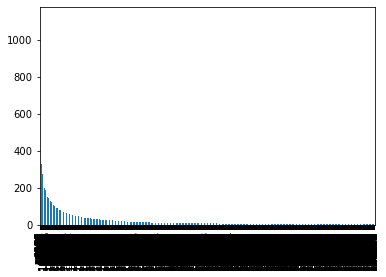

In [ ]:
#Finding the frequency of target variable 
df['movieId'].value_counts().plot(kind='bar')

In [ ]:
#Finding the frequency of target variable
df.movieId.value_counts()

296       1124
2959      1002
79132      896
2571       783
7361       773
          ... 
128856       1
73413        1
8595         1
7781         1
33454        1
Name: movieId, Length: 10488, dtype: int64

In [ ]:
#Filtering to get the list of drama movies
drama_movies=df['genres'].str.contains('Drama')
df[drama_movies].head()

,userId,movieId,rating,timestamp_2,title,genres,year
1,121,778,4.0,3/23/2011 4:00,Trainspotting,Comedy|Crime|Drama,1996
2,121,778,4.0,3/23/2011 4:00,Trainspotting,Comedy|Crime|Drama,1996
3,121,778,4.0,3/23/2011 4:00,Trainspotting,Comedy|Crime|Drama,1996
4,121,778,4.0,3/23/2011 4:00,Trainspotting,Comedy|Crime|Drama,1996
42,121,36529,5.0,3/23/2011 4:04,Lord of War,Action|Crime|Drama|Thriller|War,2005


In [ ]:
#Total number of drama movies
drama_movies.shape

(225673,)

In [ ]:
#Filtering to get the list of comedy movies
comedy_movies = df['genres'].str.contains('Comedy')
df[comedy_movies].head()

,userId,movieId,rating,timestamp_2,title,genres,year
1,121,778,4.0,3/23/2011 4:00,Trainspotting,Comedy|Crime|Drama,1996
2,121,778,4.0,3/23/2011 4:00,Trainspotting,Comedy|Crime|Drama,1996
3,121,778,4.0,3/23/2011 4:00,Trainspotting,Comedy|Crime|Drama,1996
4,121,778,4.0,3/23/2011 4:00,Trainspotting,Comedy|Crime|Drama,1996
5,121,1288,4.5,4/1/2011 6:48,This Is Spinal Tap,Comedy,1984


In [ ]:
#Total number of comedy movies
comedy_movies.shape

(225673,)

In [ ]:
#Displays high rated movies
high_rated= df['rating']>4.0
df[high_rated].head(10)

,userId,movieId,rating,timestamp_2,title,genres,year
5,121,1288,4.5,4/1/2011 6:48,This Is Spinal Tap,Comedy,1984
6,121,1288,4.5,4/1/2011 6:48,This Is Spinal Tap,Comedy,1984
7,121,1288,4.5,4/1/2011 6:48,This Is Spinal Tap,Comedy,1984
8,121,1288,4.5,4/1/2011 6:48,This Is Spinal Tap,Comedy,1984
9,121,1288,4.5,4/1/2011 6:48,This Is Spinal Tap,Comedy,1984
10,121,1288,4.5,4/1/2011 6:48,This Is Spinal Tap,Comedy,1984
11,121,2706,5.0,3/22/2011 4:21,American Pie,Comedy|Romance,1999
12,121,2706,5.0,3/22/2011 4:21,American Pie,Comedy|Romance,1999
13,121,2706,5.0,3/22/2011 4:21,American Pie,Comedy|Romance,1999
14,121,2706,5.0,3/22/2011 4:21,American Pie,Comedy|Romance,1999


In [ ]:
#Displays low rated movies
high_rated= df['rating']<4.0
df[high_rated].head(10)

,userId,movieId,rating,timestamp_2,title,genres,year
79,190,2012,3.5,2/12/2012 19:29,Back to the Future Part III,Adventure|Comedy|Sci-Fi|Western,1990
80,208,72,3.5,2/5/2006 3:34,Kicking and Screaming,Comedy|Drama,1995
85,208,41573,2.5,1/16/2006 21:09,"Family Stone, The",Comedy|Drama|Romance,2005
89,316,45186,2.0,6/17/2006 9:58,Mission: Impossible III,Action|Adventure|Thriller,2006
90,318,260,3.5,2/20/2015 22:23,Star Wars: Episode IV - A New Hope,Action|Adventure|Sci-Fi,1977
91,318,260,3.5,2/20/2015 22:23,Star Wars: Episode IV - A New Hope,Action|Adventure|Sci-Fi,1977
92,318,260,3.5,2/20/2015 22:23,Star Wars: Episode IV - A New Hope,Action|Adventure|Sci-Fi,1977
98,320,2011,3.5,4/25/2006 11:14,Back to the Future Part II,Adventure|Comedy|Sci-Fi,1989
99,320,2012,3.5,4/25/2006 11:13,Back to the Future Part III,Adventure|Comedy|Sci-Fi|Western,1990
107,359,1175,3.0,4/5/2009 10:02,Delicatessen,Comedy|Drama|Romance,1991


In [ ]:
#Total number of unique movie genre
unique_genre=df['genres'].unique().tolist()
len(unique_genre)

1014

In [ ]:
#Top 25 most rated movies
most_rated = df.groupby('title').size().sort_values(ascending=False)[:25]
most_rated.head(25)

title
Pulp Fiction                                     1124
Fight Club                                       1002
Inception                                         896
Matrix, The                                       783
Eternal Sunshine of the Spotless Mind             773
Shawshank Redemption, The                         731
Memento                                           711
Donnie Darko                                      698
Silence of the Lambs, The                         590
Blade Runner                                      577
Seven (a.k.a. Se7en)                              567
Amelie (Fabuleux destin d'Amélie Poulain, Le)     560
Usual Suspects, The                               555
Sin City                                          548
Avatar                                            542
V for Vendetta                                    536
Prestige, The                                     532
Forrest Gump                                      527
Dark Knight, The      

In [ ]:
#Slicing the dataframe to display only title and genres columns from Movielenz_dataset.csv
df[['title','genres']].head()

,title,genres
1,Trainspotting,Comedy|Crime|Drama
2,Trainspotting,Comedy|Crime|Drama
3,Trainspotting,Comedy|Crime|Drama
4,Trainspotting,Comedy|Crime|Drama
5,This Is Spinal Tap,Comedy


In [ ]:
#Defining a function that counts the number of times each genre appears
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [ ]:
#Making census of the genres
genre_labels = set()
for s in df['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [ ]:
#Counting how many times each of genres occur
keyword_occurences, dum = count_word(df, 'genres', genre_labels)
keyword_occurences

[['Drama', 116963],
 ['Thriller', 66643],
 ['Comedy', 66375],
 ['Action', 61515],
 ['Sci-Fi', 44871],
 ['Adventure', 43795],
 ['Crime', 39664],
 ['Romance', 39323],
 ['Fantasy', 26482],
 ['Mystery', 25510],
 ['Horror', 21266],
 ['IMAX', 14188],
 ['Animation', 13474],
 ['Children', 11701],
 ['War', 11317],
 ['Musical', 7882],
 ['Documentary', 5266],
 ['Film-Noir', 3847],
 ['Western', 3485],
 ['(no genres listed)', 31]]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

from timeit import default_timer
start = default_timer()

#### Let’s plot a histogram for number of ratings to check the distribution

<function matplotlib.pyplot.show(*args, **kw)>

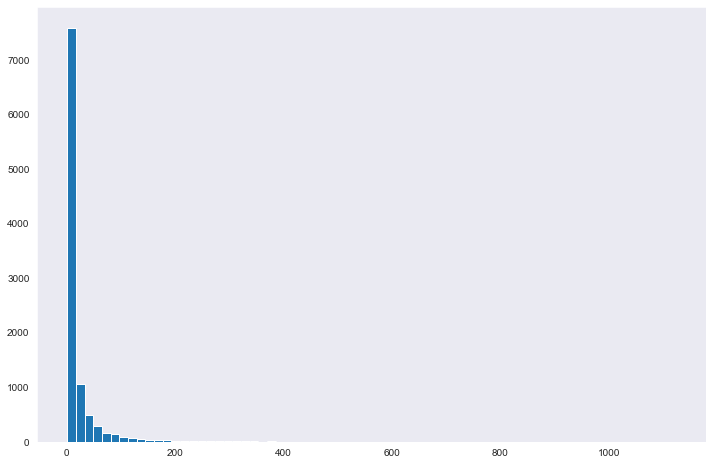

In [ ]:
ratings=pd.DataFrame(df.groupby("title").mean()['rating'])
ratings['number of ratings']=pd.DataFrame(df.groupby("title").count()["rating"])

ratings.sort_values(by='rating', ascending=False)

plt.figure(figsize=(12,8))
plt.hist(ratings['number of ratings'], bins=70,)
plt.show

Looks neat! Along the x-axis, we have the number of times movies have been rated. Along the y-axis, we have how how many times those movies have been rated. For example, the number of movies that have been rated by 0–10 people are more than 500! 

Now let’s plot another histogram. This time, we'll plot a histogram for average ratings.

<function matplotlib.pyplot.show(*args, **kw)>

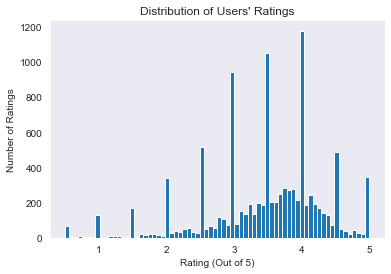

In [ ]:
plt.hist(ratings['rating'],bins=70)
plt.title("Distribution of Users' Ratings")
plt.ylabel('Number of Ratings')
plt.xlabel('Rating (Out of 5)');
plt.show

Along the x-axis, we have the average movie ratings and along the y-axis, we have the number of movies. This visualization shows a negatively-skewed distribution of the data.

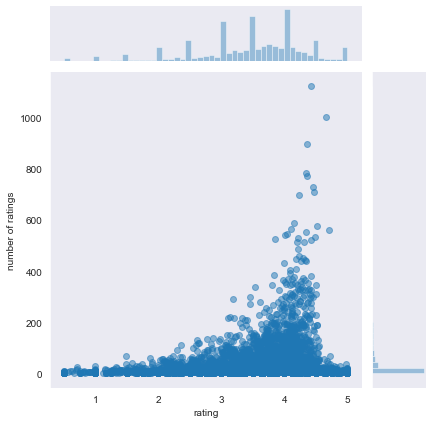

In [ ]:
#Relation between average rating and number of ratings
sns.jointplot(x='rating',y='number of ratings',data=ratings,alpha=0.5)

The above plot shows that as the rating increases, the number of ratings of that movie also increases. In addition to it, the figure clearly depicts the movies which have been rated by very few people by isolated dots (ends of the x-axis).

<BarContainer object of 20 artists>

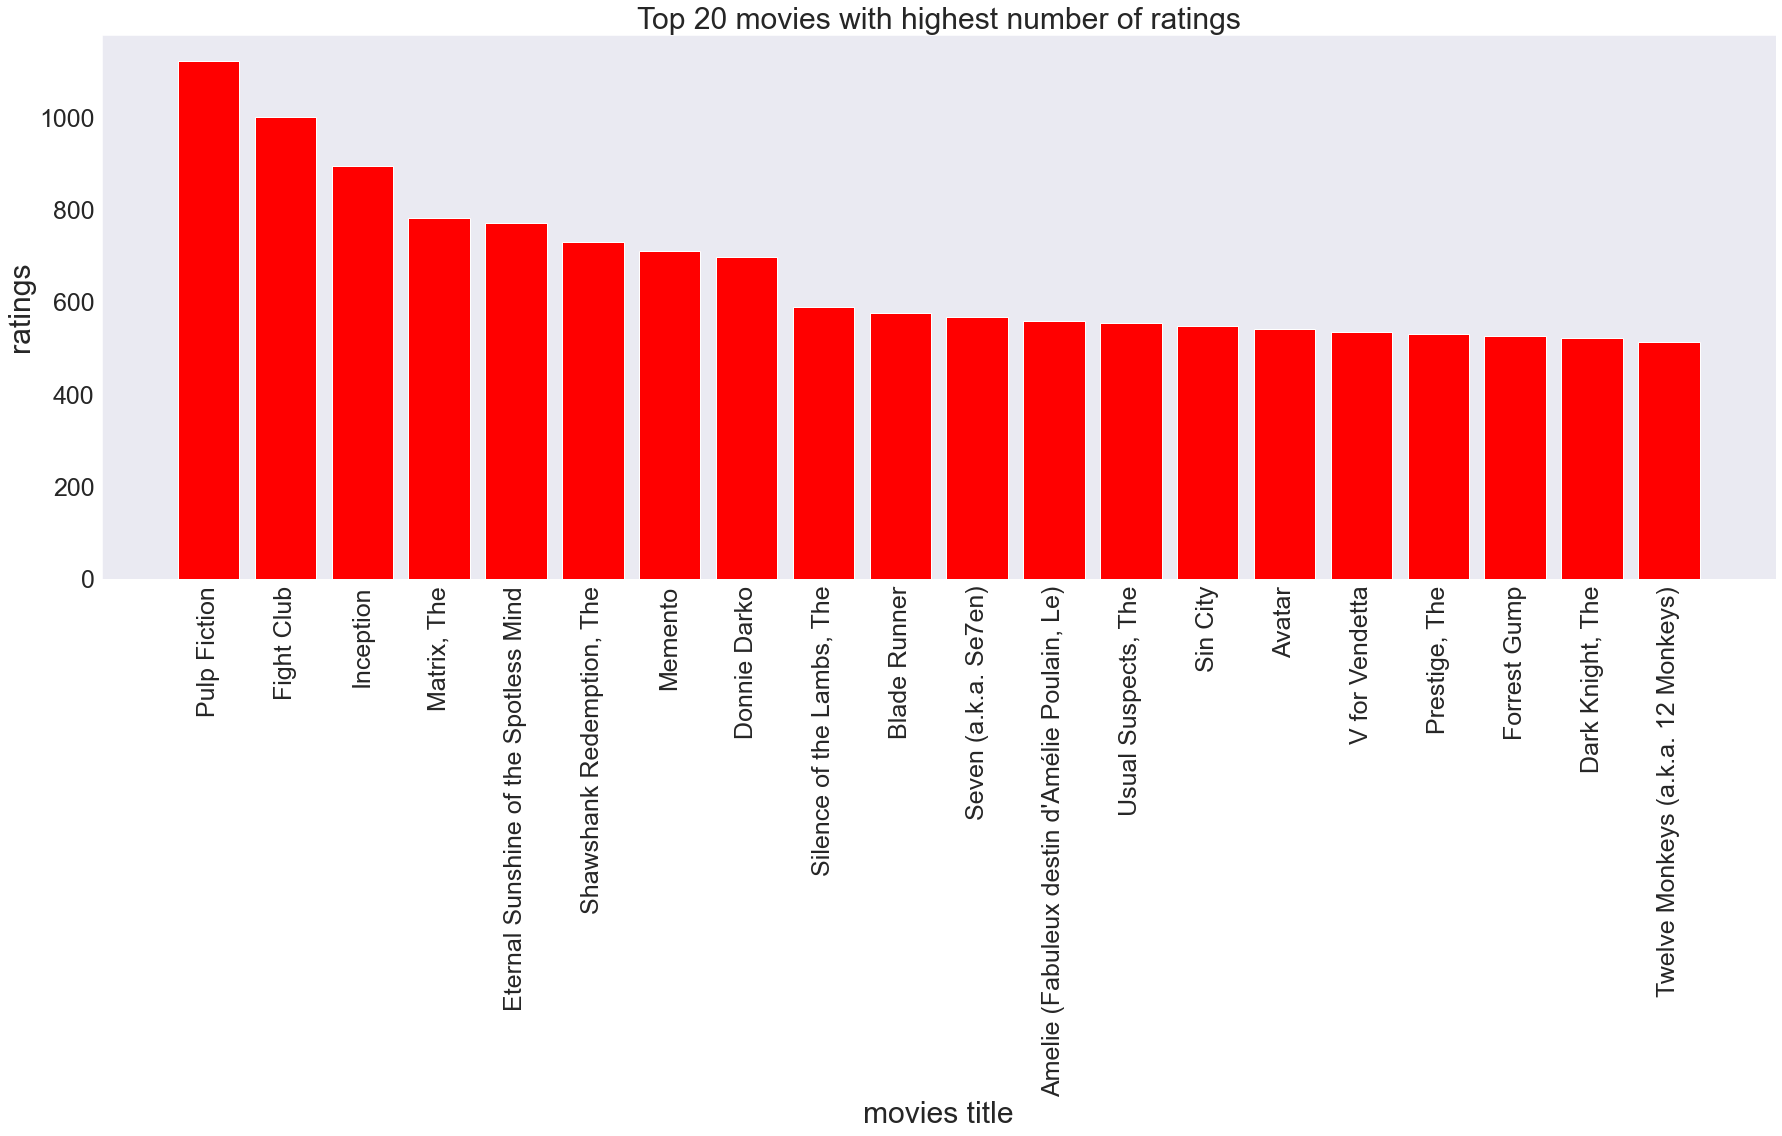

In [ ]:
#Printing top 20 movies with highest number of ratings
df2=df.groupby('title')[['rating']].count()
rating_count_20=df2.nlargest(20,'rating')


plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest number of ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.yticks(fontsize=25)
plt.xlabel('movies title',fontsize=30)
plt.ylabel('ratings',fontsize=30)

plt.bar(rating_count_20.index,rating_count_20.rating,color='red')

In [ ]:
df.dtypes

userId           int64
movieId          int64
rating         float64
timestamp_2     object
title           object
genres          object
year            object
dtype: object

In [ ]:
#Check and clean NaN values
print ("Number of movies Null values: ", df['movieId'].isnull().sum())
print ("Number of ratings Null values: ", df['rating'].isnull().sum())

Number of movies Null values:  0
Number of ratings Null values:  0


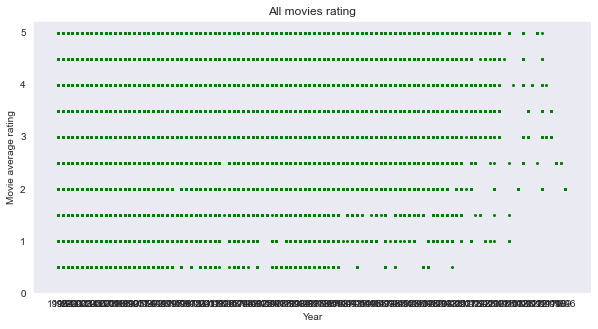

Elapsed time(sec):  1.87


In [ ]:
#Plotting Movie average rating versus year

#df['year']= df['year'].astype('int')
st = default_timer()

plt.figure(figsize=(10,5))
plt.plot(df.year, df.rating,"g.", markersize=4)
plt.xlabel('Year')
plt.ylabel('Movie average rating')
plt.title('All movies rating')
plt.ylim(0,)
plt.show()

#Housekeeping
%reset_selective -f (^dftmp$)

runtime = default_timer() - st
print ("Elapsed time(sec): ", round(runtime,2))

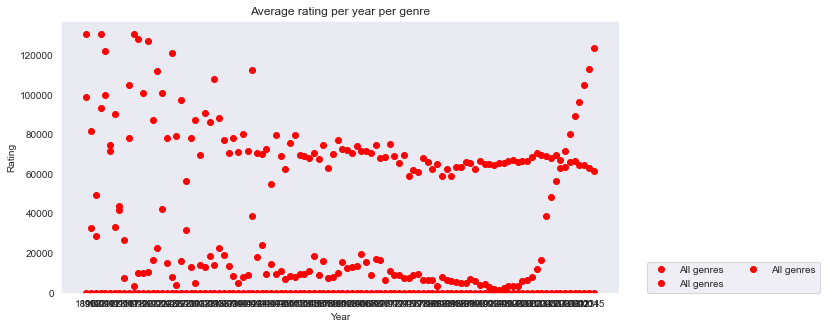

Elapsed time(sec):  2.11


In [ ]:
st = default_timer()

plt.figure(figsize=(10,5))

dftmp = df.groupby('year').mean()
plt.plot(dftmp, "o", label='All genres', color='red')

plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Average rating per year per genre')
plt.legend(loc=(1.05,0), ncol=2)
plt.ylim(0,)
plt.show()

#Housekeeping
%reset_selective -f (^dftmp$|^genre$)

runtime = default_timer() - st
print ("Elapsed time(sec): ", round(runtime,2))

#### PLOT : Average ratings per user.

INSIGHT: Users have a positive bias in general, with roughly 95% of their average ratings above the mid-point of 2.5. This is could have many explanations: users are choosing to watch "better" movies due to available ratings (and this should get better over time, as the rating system expands), or users don't bother to rate "bad" movies as much as they do "good" ones (i.e. we don't want others to know we watched such things).

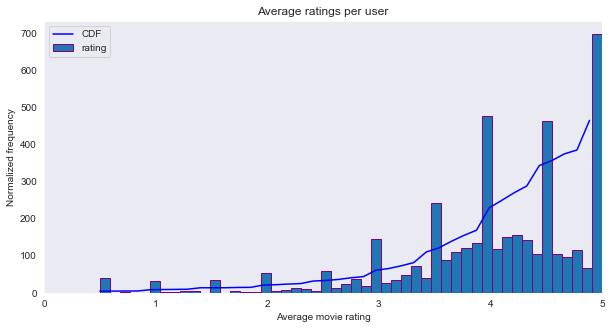

Elapsed time(sec):  0.28


In [ ]:
st = default_timer()

dftmp = df[['userId','rating']].groupby('userId').mean()
# Plot histogram
dftmp.plot(kind='hist', bins=50, grid=0, edgecolor='purple', figsize=(10,5))
# Plot cumulative function on top (couldn't do any other way)
# Evaluate the histogram
values, base = np.histogram(dftmp, bins=40)
# Evaluate the cumulative (multiply by the average distance between points in the x-axis to get UNIT area)
cumulative = np.cumsum(values) * np.diff(base).mean()
# Plot the cumulative function
plt.plot(base[:-1], cumulative, c='blue', label='CDF')
plt.xlim(0,5)
plt.legend()
plt.xlabel ('Average movie rating')
plt.ylabel ('Normalized frequency')
plt.title ('Average ratings per user')
plt.show()

# Housekeeping
%reset_selective -f (^dftmp$|^base$|^cumulative$|^values$)

runtime = default_timer() - st
print ("Elapsed time(sec): ", round(runtime,2))

#### UNIVARIATE ANALYSIS

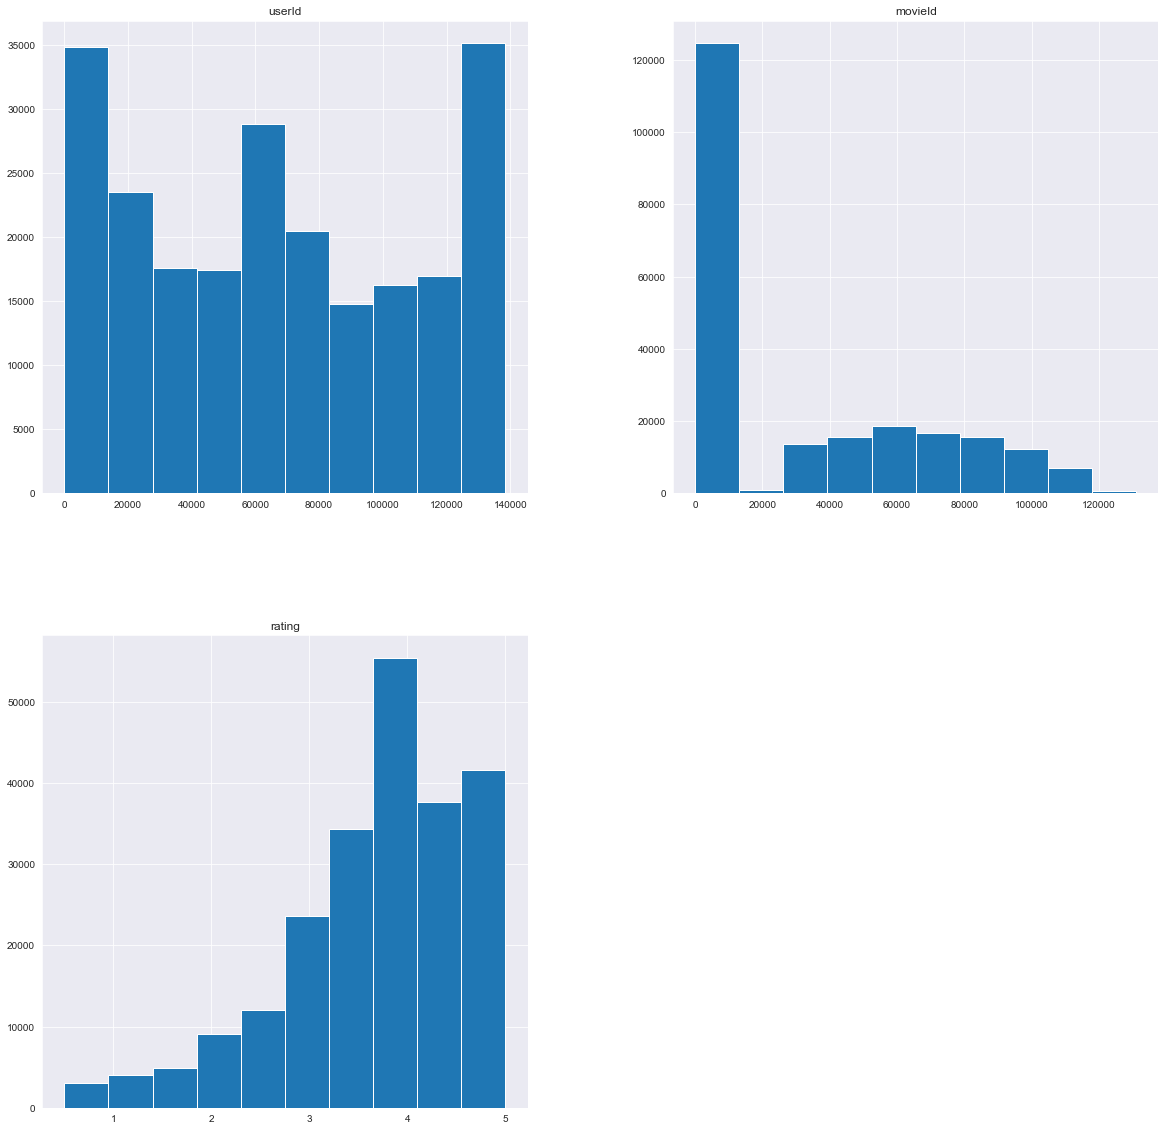

In [ ]:
#Histogram
df.hist(figsize=(20, 20));

#### BIVARIATE ANALYSIS

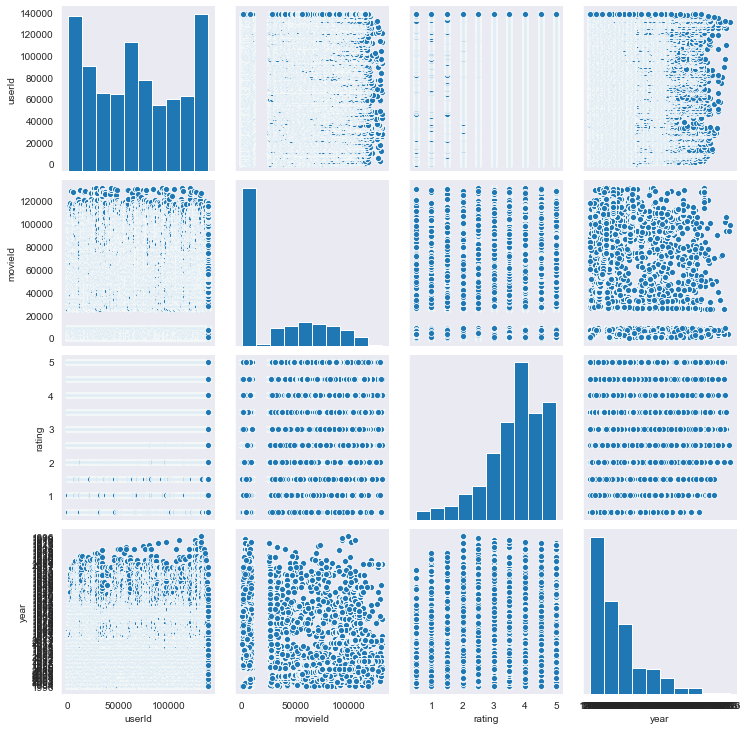

In [ ]:
sns.pairplot(data = df);

In [ ]:
#Finding the correlation between the variables
df.corr()

,userId,movieId,rating
userId,1.000000,-0.004054,-0.025608
movieId,-0.004054,1.000000,-0.110618
rating,-0.025608,-0.110618,1.000000


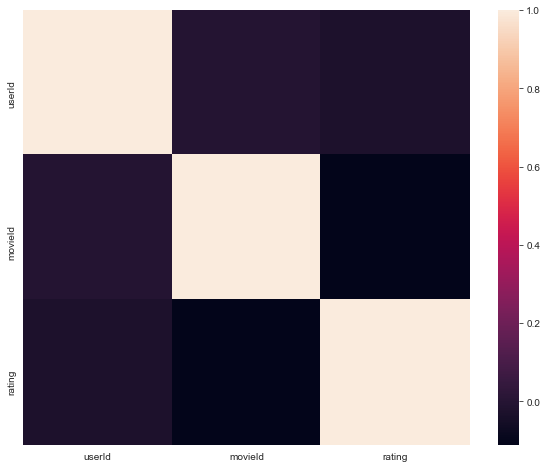

In [ ]:
#Plotting the correlation using heatmap
plt.subplots(figsize=(10,8))
sns.heatmap(df.corr());

### 3) In this phase, we will atempt to build two base models, one for collaborative filtering and one for content filtering

In [ ]:
#IMPORTING PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from timeit import default_timer
start = default_timer()
plt.style.use('ggplot')

In [ ]:
#Importing file
df= pd.read_csv('df2_temp.csv')

In [ ]:
#Droping duplicates
df1 = df.drop_duplicates()

In [ ]:
#Checking the top rows of the dataset
df1.head()

,Unnamed: 0,userId,movieId,rating,timestamp_2,title,genres
0,0,18,4141,NaN,NaN,Head Over Heels (2001),Comedy|Romance
1,1,121,778,4.0,2011-03-23 04:00:30,Trainspotting (1996),Comedy|Crime|Drama
2,2,121,778,4.0,2011-03-23 04:00:30,Trainspotting (1996),Comedy|Crime|Drama
3,3,121,778,4.0,2011-03-23 04:00:30,Trainspotting (1996),Comedy|Crime|Drama
4,4,121,778,4.0,2011-03-23 04:00:30,Trainspotting (1996),Comedy|Crime|Drama


In [ ]:
#Dropping null values
df1 = df1.dropna()

In [ ]:
#Dropping individual customer data
df2 = df1.drop(columns=['timestamp_2', 'userId'])

In [ ]:
#Grouping columns by related information, then calculating the average rating for each movie
total_ratings=df2.groupby(['movieId','genres', 'title']).mean()['rating'].reset_index()

In [ ]:
#Checking the top rows of the dataset
total_ratings.head()

,movieId,genres,title,rating
0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995),4.000000
1,2,Adventure|Children|Fantasy,Jumanji (1995),3.368421
2,3,Comedy|Romance,Grumpier Old Men (1995),3.416667
3,4,Comedy|Drama|Romance,Waiting to Exhale (1995),2.800000
4,5,Comedy,Father of the Bride Part II (1995),2.800000


In [ ]:
#Checking the data types for each column - rating is a floating number, which we want changed to an int
total_ratings.dtypes

movieId      int64
genres      object
title       object
rating     float64
dtype: object

In [ ]:
total_ratings['rating']=total_ratings['rating'].astype(int)

In [ ]:
#Checking the data types after change from float to int
total_ratings.dtypes

movieId     int64
genres     object
title      object
rating      int32
dtype: object

#### We now have th dataset ready for the content based model. We will use Term Frequency - Inverse Document Frequency to build the base of our model
#### https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.fit_transform

In [ ]:
#Fit the TF-IDF model based on generes
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=1)
x = tfv.fit_transform(total_ratings['genres'])

In [ ]:
#Here we are running the sigmoid activation fucntion for the "X" fitted in the previous step
from sklearn.metrics.pairwise import sigmoid_kernel
model = sigmoid_kernel(x, x)

In [ ]:
df3 = total_ratings.copy()
ti=[]
for i in df3["title"]:
    ti.append(i.split(' (')[0])
df3["title"] = ti

In [ ]:
# Here, we are writing a function to get the top recommendations basd on the model score. The input will be the movie title
#of a movie. 
def recommendations(title):
    i_d=[]
    indices=pd.Series(df3.index,index=df3['title']).drop_duplicates()
    idx = indices[title]
    dis_scores = list(enumerate(model[idx]))
    dis_scores = sorted(dis_scores, key=lambda x: x[1], reverse=True)
    dis_scores = dis_scores[1:31]
    idn = [i[0] for i in dis_scores]
    final =df3.iloc[idn].reset_index()
    idn = [i for i in final['index']]
    for j in idn:
        if(j<15951):
            i_d.append(j)
    indices=pd.Series(df3.index,index=df3['title']).drop_duplicates()
    for i in range(1,8):
        if (idn):
            print(indices.iloc[i_d].index[i])

In [ ]:
#Retreiving dataframe containing childrens movies
total_ratings[total_ratings['genres'].str.contains('Children')]

,movieId,genres,title,rating
0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995),4
1,2,Adventure|Children|Fantasy,Jumanji (1995),3
10,13,Adventure|Animation|Children,Balto (1995),3
24,27,Children|Drama,Now and Then (1995),5
30,34,Children|Drama,Babe (1995),2
40,48,Animation|Children|Drama|Musical|Romance,Pocahontas (1995),3
44,54,Children|Comedy,"Big Green, The (1995)",3
48,60,Adventure|Children|Fantasy,"Indian in the Cupboard, The (1995)",4
64,80,Children|Drama,"White Balloon, The (Badkonake sefid) (1995)",2
70,87,Children|Comedy,Dunston Checks In (1996),3


#### Let us test getting movie recommendations based on "Childern" genere

In [ ]:
recommendations('Toy Story')

Toy Story 2
Adventures of Rocky and Bullwinkle, The
Emperor's New Groove, The
Monsters, Inc.
DuckTales: The Movie - Treasure of the Lost Lamp
Wild, The
Shrek the Third


In [ ]:
#Retreiving dataframe containing comedies
total_ratings[total_ratings['genres'].str.contains('Comedy')]

,movieId,genres,title,rating
0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995),4
2,3,Comedy|Romance,Grumpier Old Men (1995),3
3,4,Comedy|Drama|Romance,Waiting to Exhale (1995),2
4,5,Comedy,Father of the Bride Part II (1995),2
6,7,Comedy|Romance,Sabrina (1995),3
8,11,Comedy|Drama|Romance,"American President, The (1995)",2
9,12,Comedy|Horror,Dracula: Dead and Loving It (1995),3
15,18,Comedy,Four Rooms (1995),3
16,19,Comedy,Ace Ventura: When Nature Calls (1995),2
17,20,Action|Comedy|Crime|Drama|Thriller,Money Train (1995),2


#### We will now try getting movie recommendations from the Comedy genre

In [ ]:
recommendations('Father of the Bride Part II')

Ace Ventura: When Nature Calls
Bio-Dome
Friday
Black Sheep
Mr. Wrong
Happy Gilmore
Flirting With Disaster


In [ ]:
#Retreiving dataframe containing musicals
total_ratings[total_ratings['genres'].str.contains('Musical')]

,movieId,genres,title,rating
40,48,Animation|Children|Drama|Musical|Romance,Pocahontas (1995),3
83,107,Adventure|Children|Comedy|Musical,Muppet Treasure Island (1996),4
145,199,Drama|Musical|Romance,"Umbrellas of Cherbourg, The (Parapluies de Che...",3
172,242,Drama|Musical,Farinelli: il castrato (1994),3
236,346,Drama|Musical,Backbeat (1993),3
252,364,Adventure|Animation|Children|Drama|Musical|IMAX,"Lion King, The (1994)",4
326,477,Drama|Musical,What's Love Got to Do with It? (1993),3
384,549,Drama|Musical,Thirty-Two Short Films About Glenn Gould (1993),3
386,551,Animation|Children|Fantasy|Musical,"Nightmare Before Christmas, The (1993)",4
401,588,Adventure|Animation|Children|Comedy|Musical,Aladdin (1992),4


#### We will now try getting a recommendation for a Musical movie

In [ ]:
recommendations('The Magic Flute')

West Side Story
King and I, The
Moulin Rouge
Glitter
Yentl
42nd Street
Camelot


### Based on the above tests, we can see that the content-based filtering model provides recommendation based on the genre of filims that is being provided. We can use this system to accurately recommend the next movies that the users should be watching based on the current genere of movies that they have watched - hence, encouraging the users to use the MovieLens platform regularly.

### PART B) Collaborative-Filtering Model (Item Based Filtering)

In [2]:
#Here, we try to search for look alike customers and offer products based on what his/her lookalike has chosen.
#This algorithm is very effective but takes a lot of time and resources.


In [ ]:
#IMPORTING PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from timeit import default_timer
start = default_timer()
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('df2_temp.csv')
df.drop(columns=['timestamp_2'],inplace=True)
df.drop_duplicates(subset=['title','userId'], inplace=True)
df.head()

,userId,movieId,rating,title,genres
0,18,4141,NaN,Head Over Heels (2001),Comedy|Romance
1,121,778,4.0,Trainspotting (1996),Comedy|Crime|Drama
5,121,1288,4.5,This Is Spinal Tap (1984),Comedy
11,121,2706,5.0,American Pie (1999),Comedy|Romance
15,121,4718,5.0,American Pie 2 (2001),Comedy


In [ ]:
from scipy.sparse import csr_matrix
df_movie = df.pivot_table(index='title', columns='userId', values='rating').fillna(0)
df_movie_sparse = csr_matrix(df_movie.values)

In [ ]:
from sklearn.neighbors import NearestNeighbors
model=NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(df_movie_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
def reco(qry):
    pos = df_movie.index.get_loc(qry)
    distances, suggestions = model.kneighbors(df_movie.iloc[pos,:].values.reshape(1,-1))
    for i in range(len(suggestions)):
         return df_movie.index[suggestions.flatten()]# return the movie cluster #2

In [ ]:
print (model.kneighbors)

<bound method KNeighborsMixin.kneighbors of NearestNeighbors(algorithm='brute', metric='cosine')>


In [ ]:
#Which movie im 
reco('Myth, The (San wa) (2005)')

Index(['Myth, The (San wa) (2005)',
       'Children Who Chase Lost Voices from Deep Below (Hoshi o ou kodomo) (Journey to Agartha) (2011)',
       'Amelia (2009)', 'Monster in Paris, A (Un monstre à Paris) (2011)',
       'Mike's New Car (2002)'],
      dtype='object', name='title')

In [ ]:
reco('Speed (1994)')

Index(['Speed (1994)', 'Cliffhanger (1993)', 'Client, The (1994)',
       'Big (1988)', 'Nutty Professor, The (1996)'],
      dtype='object', name='title')

In [ ]:
reco('Toy Story (1995)')

Index(['Toy Story (1995)', 'Toy Story 2 (1999)', 'Finding Nemo (2003)',
       'Incredibles, The (2004)', 'Monsters, Inc. (2001)'],
      dtype='object', name='title')

In [ ]:
#Checking our model validation
seed = np.random.choice(df_movie.shape[0])
print('Movie Name:', df_movie.index[seed])
print('Top Recommendation:', reco(df_movie.index[seed]))

Movie Name: Snow White (Blancanieves) (2012)
Top Recommendation: Index(['Snow White (Blancanieves) (2012)',
       'Aelita: The Queen of Mars (Aelita) (1924)',
       'Three Marias, The (Três Marias, As) (2002)', 'Iron Horse, The (1924)',
       'Gerhard Richter Painting (2012)'],
      dtype='object', name='title')


**Conclusion:**

Our recommendation systems are successfully recommending movies based on movie ratings for each genre, as well as clustering for similar customers.
Our initial dataset was a combination of multiple .csv files for users, ratings, tags etc. We first worked on combining the dataset and cleaning out the attributes which are not required to create our recommendation system. 

After merging the datasets, we realized that some rows were being duplicated. We then worked on removing the duplicates as it was redundant data and could cause problems in our analysis and in providing recommendations. 
We followed two approaches to create our recommendation model. 

Collaborative Filtering - Item-based filtering

Content Filtering - Using genre as the base for content filtering

**The Collaborative Filtering Model** is successfully created by writing various different functions as well to get top recommendation based on the similarity between users. This means that the recommendations are being given based on the movies that similar users have watched in the past. This way even though customer preferences are changing constantly we would still be able to provide accurate recommendations to a user for movies that they would most likely watch and be interested in. This way we can continue to increase user engagement on our MovieLense platform.
           
**Testing:**

We tested the model by providing inputs of 4 different movie names to see what recommendations are being provided. Below are the input and outputs from a couple of tests

1. Input - Myth, The (San wa) (2005)
Output - 
Children Who Chase Lost Voices from Deep Below (Hoshi o ou kodomo) (Journey to Agartha) (2011),
Amelia (2009), 
Monster in Paris, A (Un monstre à Paris) (2011),
Mike's New Car (2002)

2. Input - Speed (1994)
Output - 
Cliffhanger (1993), 
Client, The (1994),
Big (1988), 
Nutty Professor, The (1996)

From both the tests the user gets recommendations for movies that the user could be interested in watching based on the movies similar users have watched. The above recommendations look pretty accurate. 

PS - To be honest if I had watched Myth, The (San wa), I would definitely be interested in watching Monster in Paris, A (Un monstre à Paris) (2011) :D

 **The Content Based Filtering Model** is successfully created by writing various different functions to get top recommendations based on the input (movie name) given.

**Testing:**

We tested the model by providing inputs of 4 different movies to see what recommendations are being provided. Below are the input and outputs from a couple of tests

1. Input - Toy Story
Output - 
Toy Story 2
Adventures of Rocky and Bullwinkle, The
Emperor's New Groove, The
Monsters, Inc.
DuckTales: The Movie - Treasure of the Lost Lamp
Wild, The
Shrek the Third

2. Input - Father of the Bride Part II
Output - 
Ace Ventura: When Nature Calls
Bio-Dome
Friday
Black Sheep
Mr. Wrong
Happy Gilmore
Flirting With Disaster

From the first test we see that the input movie provided was a kids movie and the output (which are the recommendation) are kids movies which the user would enjoy as well. In the second test the input movie is Comedy and the output (recommendations) are comedy movies as well. Hence we can conclude that the content based filtering model is providing accurate recommendations based on the genre of the movie. 

This is how the movie recommendation systems project has been created and implemented for MovieLens. We are confident that by using these models, MovieLens can increase it's user engagement and solve the problem of decrease in the engagement rate they had in the past several months. 